In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [38]:
## Read file

data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [39]:
data.replace('a',1, inplace=True)
data.replace('b',2, inplace=True)
data.replace('c',3, inplace=True)
data.replace('d',4, inplace=True)
data.replace('e',5, inplace=True)
data.replace('f',6, inplace=True)
data.replace('g',7, inplace=True)
data.replace('h',8, inplace=True)
data.replace('i',9, inplace=True)
data.replace('j',10, inplace=True)
data.replace('k',11, inplace=True)
data.replace('l',12, inplace=True)
data.replace('m',13, inplace=True)
data.replace('n',14, inplace=True)
data.replace('o',15, inplace=True)
data.replace('p',16, inplace=True)
data.replace('q',17, inplace=True)
data.replace('r',18, inplace=True)
data.replace('s',19, inplace=True)
data.replace('t',20, inplace=True)
data.replace('u',21, inplace=True)
data.replace('v',22, inplace=True)
data.replace('w',23, inplace=True)
data.replace('x',24, inplace=True)
data.replace('y',25, inplace=True)
data.replace('z',26, inplace=True)
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,16,24,19,14,20,16,6,3,14,11,...,19,23,23,16,23,15,16,11,19,21
1,5,24,19,25,20,1,6,3,2,11,...,19,23,23,16,23,15,16,14,14,7
2,5,2,19,23,20,12,6,3,2,14,...,19,23,23,16,23,15,16,14,14,13
3,16,24,25,23,20,16,6,3,14,14,...,19,23,23,16,23,15,16,11,19,21
4,5,24,19,7,6,14,6,23,2,11,...,19,23,23,16,23,15,5,14,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,5,11,19,14,6,14,1,3,2,25,...,19,15,15,16,15,15,16,2,3,12
8120,5,24,19,14,6,14,1,3,2,25,...,19,15,15,16,14,15,16,2,22,12
8121,5,6,19,14,6,14,1,3,2,14,...,19,15,15,16,15,15,16,2,3,12
8122,16,11,25,14,6,25,6,3,14,2,...,11,23,23,16,23,15,5,23,22,12


In [43]:
data = data.replace('?', np.nan)
data.dropna(how ='any', inplace = True)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,16,24,19,14,20,16,6,3,14,11,...,19,23,23,16,23,15,16,11,19,21
1,5,24,19,25,20,1,6,3,2,11,...,19,23,23,16,23,15,16,14,14,7
2,5,2,19,23,20,12,6,3,2,14,...,19,23,23,16,23,15,16,14,14,13
3,16,24,25,23,20,16,6,3,14,14,...,19,23,23,16,23,15,16,11,19,21
4,5,24,19,7,6,14,6,23,2,11,...,19,23,23,16,23,15,5,14,1,7


In [44]:
#missing data 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
habitat,0,0.0
stalk-shape,0,0.0
cap-shape,0,0.0
cap-surface,0,0.0
cap-color,0,0.0
bruises,0,0.0


<AxesSubplot:>

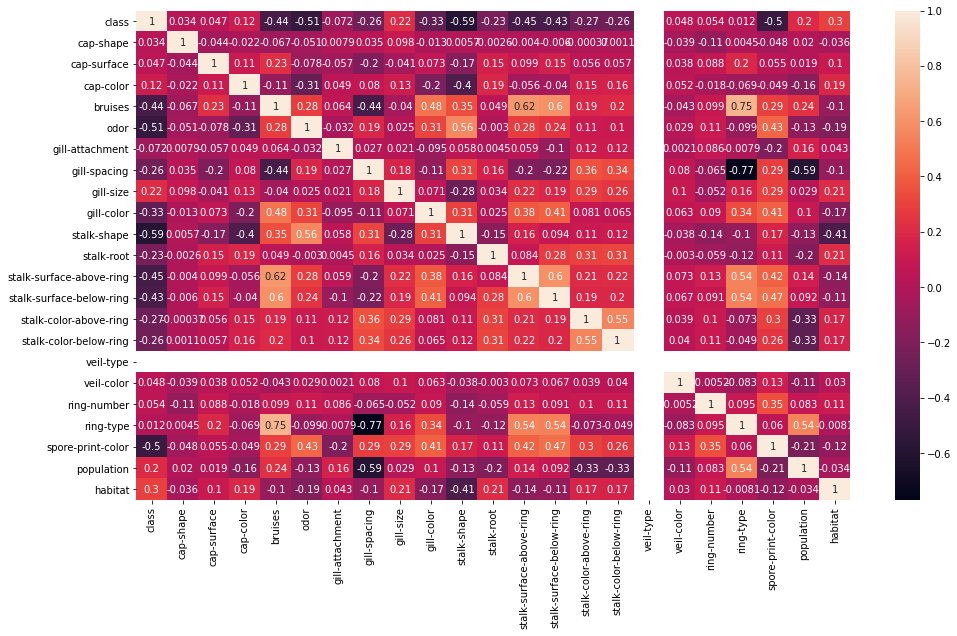

In [45]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(method='pearson'), annot=True)

In [46]:
print(data.shape)

(5644, 23)


In [47]:
data['class'].astype(int)
data['cap-shape'].astype(int)
data['cap-surface'].astype(int)
data['cap-color'].astype(int)
data['bruises'].astype(int)
data['odor'].astype(int)
data['gill-attachment'].astype(int)
data['gill-spacing'].astype(int)
data['gill-size'].astype(int)
data['gill-color'].astype(int)
data['stalk-shape'].astype(int)
data['stalk-root'].astype(int)
data['stalk-surface-above-ring'].astype(int)
data['stalk-surface-below-ring'].astype(int)
data['stalk-color-above-ring'].astype(int)
data['stalk-color-below-ring'].astype(int)
data['veil-type'].astype(int)
data['veil-color'].astype(int)
data['ring-number'].astype(int)
data['ring-type'].astype(int)
data['spore-print-color'].astype(int)
data['population'].astype(int)
data['habitat'].astype(int)

0       21
1        7
2       13
3       21
4        7
        ..
7986    16
8001    16
8038    16
8095     4
8114     4
Name: habitat, Length: 5644, dtype: int32

In [48]:
features = data.drop('class', axis=1)
labels = data['class']

In [49]:
features.select_dtypes(exclude=['int64']).columns

Index(['stalk-root'], dtype='object')

In [50]:
X = features
y = labels

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train decision tree classifier
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [53]:
tree_pred = clf.predict(X_test)
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 1.0
Report:               precision    recall  f1-score   support

           5       1.00      1.00      1.00      1058
          16       1.00      1.00      1.00       636

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694



In [56]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

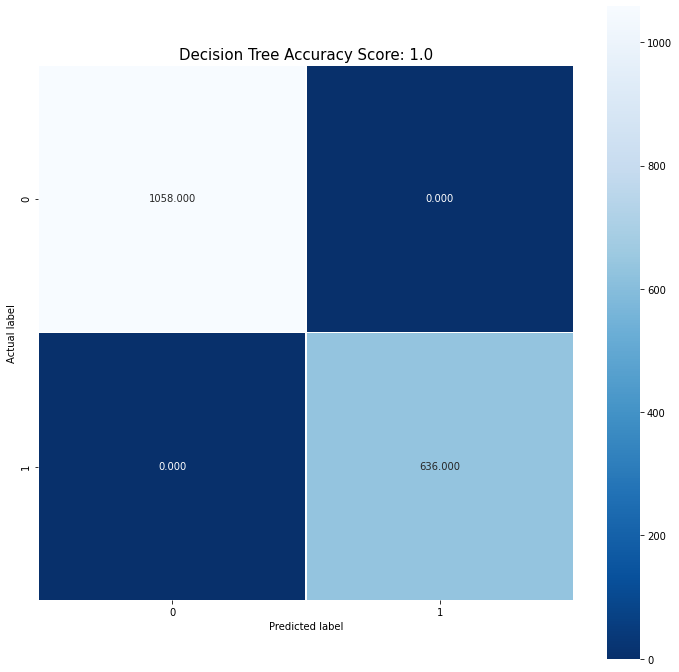

In [57]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "Blues_r");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = "Decision Tree Accuracy Score: {0}".format(tree_score);
plt.title(title, size = 15);

In [58]:
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
#Train decision tree classifier
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [59]:
tree_pred = clf.predict(X_test)
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 1.0
Report:               precision    recall  f1-score   support

           5       1.00      1.00      1.00      1058
          16       1.00      1.00      1.00       636

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694



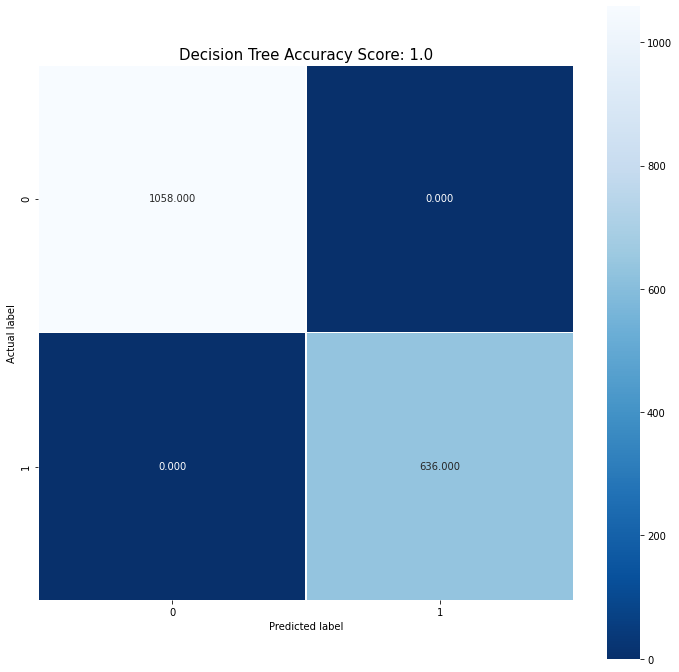

In [60]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "Blues_r");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = "Decision Tree Accuracy Score: {0}".format(tree_score);
plt.title(title, size = 15);

In [61]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

In [62]:
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))

Accuracy: 0.679456906729634
Report:               precision    recall  f1-score   support

           5       0.66      0.99      0.79      1058
          16       0.92      0.16      0.27       636

    accuracy                           0.68      1694
   macro avg       0.79      0.58      0.53      1694
weighted avg       0.76      0.68      0.60      1694



In [63]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

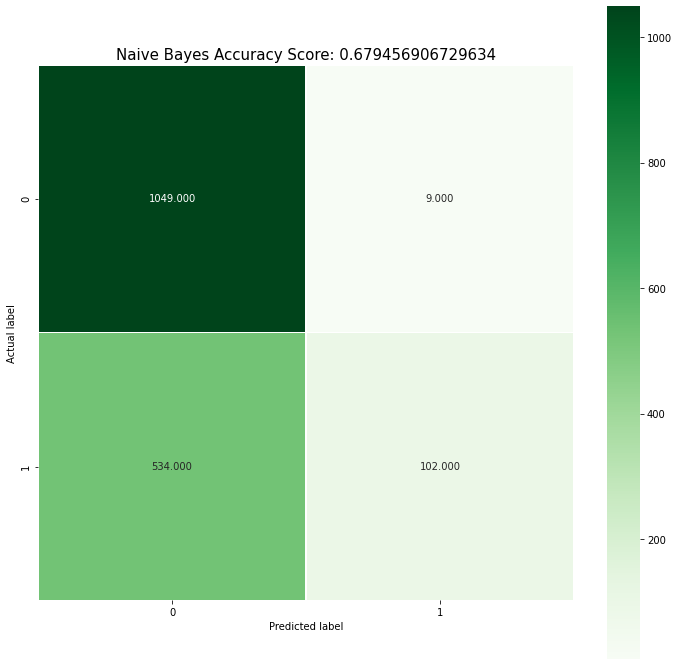

In [64]:
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "Greens");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = "Naive Bayes Accuracy Score: {0}".format(bayes_score);
plt.title(title, size = 15);

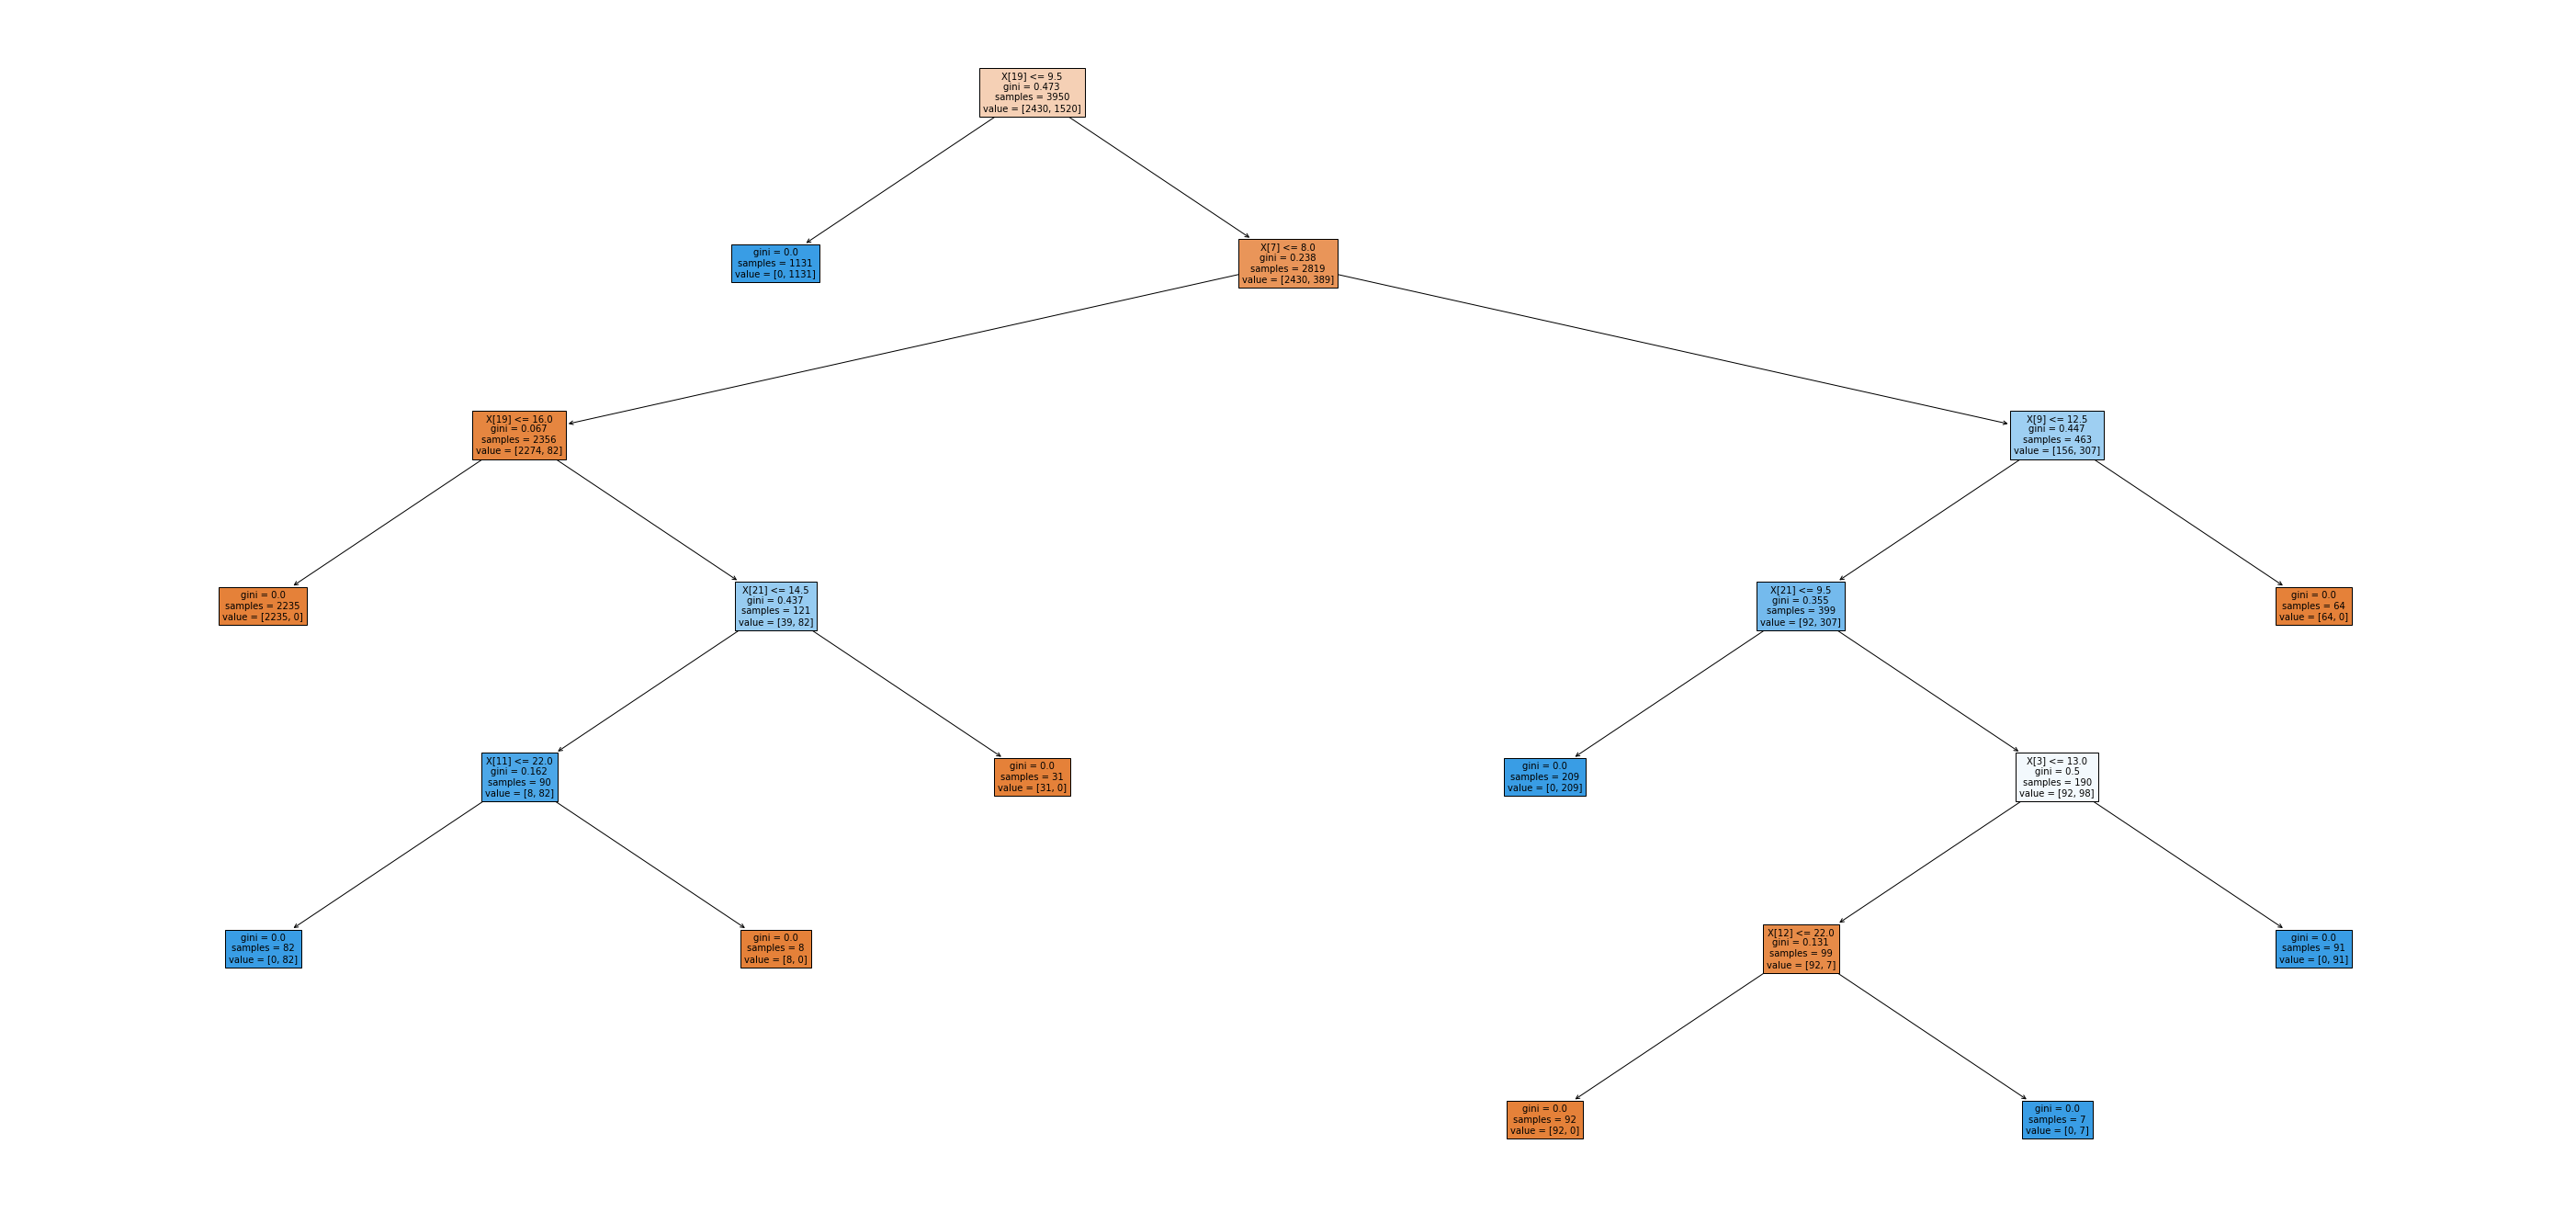

In [65]:
fig, ax = plt.subplots(figsize = (50,24))
tree.plot_tree(clf, filled = True, fontsize = 10)
plt.savefig('decision_tree_heart', dpi=100)